<a href="https://colab.research.google.com/github/Priyanka-Kugapriya/Clustering_notebook/blob/main/Scatter%20plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

#changepath to CSV

df= pd.read_csv("/content/sample_data/Layer-Readings_2.csv",header=None)

In [33]:
df.columns = ['0','1','2', '3','4','5','6','7','8','9','10','11','12','13','14']

In [34]:
df.drop(['3','5', '7', '9', '11', '13','14'],axis='columns', inplace=True)

In [35]:
test = df.to_dict(orient="records")

In [ ]:
test

In [37]:
frame_define = []
for i in test:
  key_arr = i.keys()
  for key in key_arr:
    if key not in ['0','1']:
      dc1 = {}
      dc1['X'] = i.get('0')
      dc1['Y'] = i.get('1')
      dc1['Column'] = key
      dc1['Value'] = i.get(key)
      frame_define.append(dc1)

In [38]:
df2 = pd.DataFrame(frame_define)

In [39]:
df3 = df2.loc[~((df2['Value'] == 0))]

In [42]:
df3

,X,Y,Column,Value
0,0,0,2,329.996735
6,0,0,2,330.775604
12,0,0,2,329.943512
13,0,0,4,363.551544
18,0,0,2,329.553131
...,...,...,...,...
3043567,1174172,1736705,4,2868.770264
3043568,1174172,1736705,6,1771.906250
3043569,1174172,1736705,8,1969.887939
3043570,1174172,1736705,10,1947.039795


In [41]:
df3.dropna(subset = ["Value"], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df3.to_csv("xydf.csv")

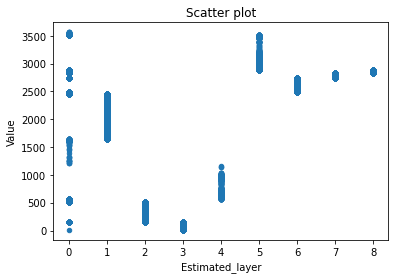

In [20]:
#original dataset df4 without any reduction
import matplotlib.pyplot as plot

df3.plot.scatter(x="Estimated_layer", y="Value", title= "Scatter plot");
plot.show(block=True);

In [43]:
def  estimated_flayer_check(Value):
    if 1640.422485	<= Value < 2454.603760:   #range values defined using previously found 8 clusters 
        return 1
    elif 162.037338	<= Value < 507.744263:
        return 2
    elif 9.638062 <= Value < 158.638474:
        return 3
    elif 571.511841 <= Value < 1173.570801:
        return 4
    elif 2889.859619 <= Value < 3512.961670:
        return 5
    elif 2495.293701 <= Value < 2737.822754:
        return 6
    elif 2739.154053 <= Value < 2824.901123:
        return 7
    elif 2829.354736	<= Value < 2889.367920:
        return 8
    else:
        return 0                                  #values which does not come under specified range

In [44]:
#checked on the original dataset without any reduction
df3['Estimated_layer'] = df3['Value'].apply(estimated_flayer_check)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
print(df3['Estimated_layer'].value_counts())

2    423367
7    243057
8    176025
1    109644
5     65883
6     27946
3     18345
0      2804
4      1820
Name: Estimated_layer, dtype: int64


In [46]:
df3_plot1= df3[df3['Estimated_layer']==1].copy()
df3_plot2= df3[df3['Estimated_layer']==2].copy()
df3_plot7= df3[df3['Estimated_layer']==7].copy()
df3_plot8= df3[df3['Estimated_layer']==8].copy()

In [58]:
df3_plot1_scatter= df3_plot1[df3_plot1['Estimated_layer']>0]
df3_plot1_scatter['num']=df3_plot1_scatter. index
df3_plot1_scatter=df3_plot1_scatter[df3_plot1_scatter['num']%20==0]

df3_plot2_scatter= df3_plot2[df3_plot2['Estimated_layer']>0]
df3_plot2_scatter['num']=df3_plot2_scatter. index
df3_plot2_scatter=df3_plot2_scatter[df3_plot2_scatter['num']%20==0]

df3_plot7_scatter= df3_plot7[df3_plot7['Estimated_layer']>0]
df3_plot7_scatter['num']=df3_plot7_scatter. index
df3_plot7_scatter=df3_plot7_scatter[df3_plot7_scatter['num']%20==0]

df3_plot8_scatter= df3_plot8[df3_plot8['Estimated_layer']>0]
df3_plot8_scatter['num']=df3_plot8_scatter. index
df3_plot8_scatter=df3_plot8_scatter[df3_plot8_scatter['num']%20==0]

x1=df3_plot1_scatter['X']
y1=df3_plot1_scatter['Y']
z1=df3_plot1_scatter['Value']

x2=df3_plot2_scatter['X']
y2=df3_plot2_scatter['Y']
z2=df3_plot2_scatter['Value']

x3=df3_plot7_scatter['X']
y3=df3_plot7_scatter['Y']
z3=df3_plot7_scatter['Value']

x4=df3_plot8_scatter['X']
y4=df3_plot8_scatter['Y']
z4=df3_plot8_scatter['Value']

fig = go.Figure(data=[go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    mode='markers',
    marker=dict(
        size=2,
        color=z1,                # set color to an array/list of desired values
        colorscale='algae',   # choose a colorscale
        opacity=0.8
    )
),go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        size=2,
        color=z2,                # set color to an array/list of desired values
        colorscale='blues',   # choose a colorscale
        opacity=0.8
    )
),go.Scatter3d(
    x=x3,
    y=y3,
    z=z3,
    mode='markers',
    marker=dict(
        size=2,
        color=z2,                # set color to an array/list of desired values
        colorscale='peach',   # choose a colorscale
        opacity=0.8
    )
),go.Scatter3d(
    x=x4,
    y=y4,
    z=z4,
    mode='markers',
    marker=dict(
        size=2,
        color=z2,                # set color to an array/list of desired values
        colorscale='purp',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [59]:
frames = [df3_plot1,df3_plot2,df3_plot7,df3_plot8]
df3_final_plot = pd.concat(frames, keys=['label1', 'label2', 'label7', 'label8'])
print(df3_final_plot)

                      X        Y Column        Value  Estimated_layer
label1 19             0        0      4  2318.262207                1
       21             0        0      8  2280.695313                1
       115            0        0      4  2297.208984                1
       157            0        0      4  2360.246338                1
       187            0        0      4  2318.826660                1
...                 ...      ...    ...          ...              ...
label8 3043506  1177450  1736705      2  2870.993652                8
       3043542  1175482  1736705      2  2871.412109                8
       3043549  1175156  1736705      4  2871.078369                8
       3043561  1174500  1736705      4  2875.610352                8
       3043567  1174172  1736705      4  2868.770264                8

[952093 rows x 5 columns]


In [60]:
df3_final_plot

X        Y Column        Value  Estimated_layer
label1 19             0        0      4  2318.262207                1
       21             0        0      8  2280.695313                1
       115            0        0      4  2297.208984                1
       157            0        0      4  2360.246338                1
       187            0        0      4  2318.826660                1
...                 ...      ...    ...          ...              ...
label8 3043506  1177450  1736705      2  2870.993652                8
       3043542  1175482  1736705      2  2871.412109                8
       3043549  1175156  1736705      4  2871.078369                8
       3043561  1174500  1736705      4  2875.610352                8
       3043567  1174172  1736705      4  2868.770264                8

[952093 rows x 5 columns]